# First Analysis



In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
en_songs = pd.read_csv('song_lyrics_filtered.csv')
en_songs.shape

(587164, 8)

In [3]:
en_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587164 entries, 0 to 587163
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     587162 non-null  object
 1   tag       587164 non-null  object
 2   artist    587164 non-null  object
 3   year      587164 non-null  int64 
 4   views     587164 non-null  int64 
 5   features  587164 non-null  object
 6   lyrics    587164 non-null  object
 7   id        587164 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 35.8+ MB


In [4]:
en_songs.columns

Index(['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'id'], dtype='object')

In [5]:
print("Number of unique artists:", en_songs['artist'].nunique())
print("Number of songs:", len(en_songs))

Number of unique artists: 82344
Number of songs: 587164


In [6]:
en_songs.isnull().sum()

title       2
tag         0
artist      0
year        0
views       0
features    0
lyrics      0
id          0
dtype: int64

In [3]:
null_rows = en_songs[en_songs.isnull().any(axis=1)]

print("Rows with null values:")
print(null_rows)

Rows with null values:
       title  tag             artist  year  views features   
316745   NaN   rb         VELVETEARS  2016   3011       {}  \
328793   NaN  pop  Elevation Worship  2017   7690       {}   

                                                   lyrics       id  
316745  [Verse 1]\nI be chillin on the west side\nI ai...  2932042  
328793  [Verse 1]\nYou are the One\nWho knows my need\...  3019135  


In [4]:
# english_songs=en_songs.drop_duplicates()
english_songs = en_songs.dropna()
english_songs.shape

(587162, 8)

In [ ]:
english_songs.to_csv('././filtered_english_songs2.csv', index=False)

In [9]:
en_songs.describe()

,year,views,id
count,587164.000000,5.871640e+05,5.871640e+05
mean,2010.221277,2.054771e+04,2.745622e+06
std,24.947754,1.321148e+05,2.047231e+06
min,1.000000,1.000000e+03,1.000000e+00
25%,2008.000000,1.634000e+03,8.820908e+05
50%,2015.000000,3.142000e+03,2.725638e+06
75%,2018.000000,8.666000e+03,4.138769e+06
max,2023.000000,1.757563e+07,7.880159e+06


In [10]:
unique_tag_count = en_songs['tag'].nunique()

print("Number of Unique Tags:", unique_tag_count)

Number of Unique Tags: 5


# Some graphs

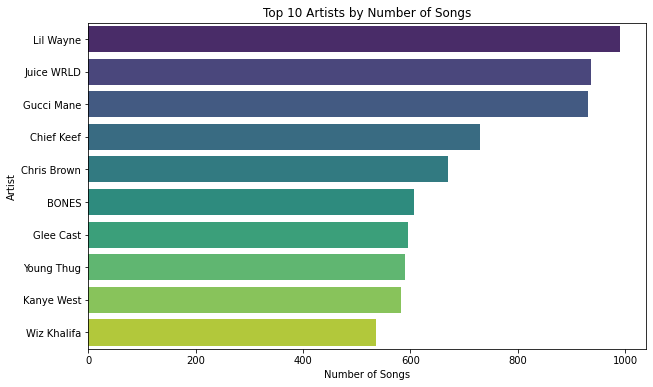

In [33]:
top_artists = en_songs['artist'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

In [5]:
en_songs = en_songs[en_songs['artist'] != 'Genius Romanizations']
en_songs = en_songs[en_songs['artist'] != 'Genius English Translations']


In [42]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/micacapart/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

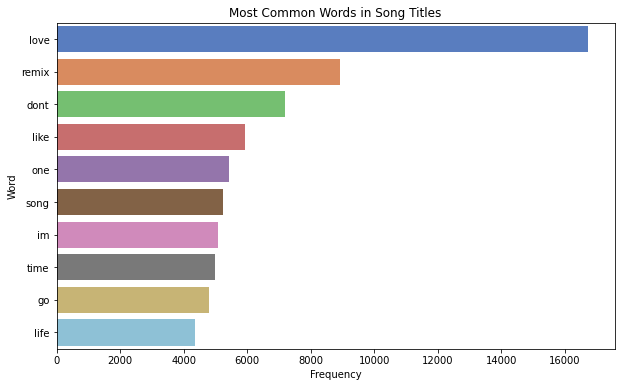

In [16]:
# Extract words from titles
all_titles = ' '.join(en_songs['title'].dropna())
words = re.findall(r'\w+', all_titles.lower())
filtered_words = [word for word in words if word not in stopwords.words('english')]

word_count = Counter(filtered_words)
most_common_words = word_count.most_common(10)

# Plot the most common words in song titles
plt.figure(figsize=(10, 6))
sns.barplot(x=[wc[1] for wc in most_common_words], y=[wc[0] for wc in most_common_words], palette='muted')
plt.title('Most Common Words in Song Titles')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [22]:

all_titles = ' '.join(en_songs['lyrics'].dropna())
words = re.findall(r'\w+', all_titles.lower())
filtered_words = [word for word in words if word not in stopwords.words('english')]

word_count = Counter(filtered_words)
most_common_words = word_count.most_common(10)

# Plot the most common words in song titles
plt.figure(figsize=(10, 6))
sns.barplot(x=[wc[1] for wc in most_common_words], y=[wc[0] for wc in most_common_words], palette='muted')
plt.title('Most Common Words in Song Lyrics')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [10]:
en_songs['lyric_length'] = en_songs['lyrics'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)




Number of songs with lyrics longer than 15,000 words: 2


In [30]:
# Step 2: Filter the DataFrame for lyrics longer than 15,000 words
long_lyrics = en_songs[en_songs['lyric_length'] < 4000]

# Step 3: Count the number of songs with lyrics longer than 15,000 words
num_long_lyrics = len(long_lyrics)
long_lyrics_selected = long_lyrics[['title', 'lyric_length']]
long_lyrics_selected = long_lyrics_selected.sort_values(by='lyric_length', ascending=False)
print(long_lyrics_selected.head())
print("Number of songs with lyrics longer than 2500 words:", num_long_lyrics, " total ", len(en_songs))

                                                    title  lyric_length
394923                     Hollow Da Don vs. Arsonal 2018          3975
228222                           The Gang Runs for Office          3974
245244  The Crack Epidemic and the Advent of Modern Hi...          3964
134455               The Resistance: Rise Of The Runaways          3963
99812                             Swave Sevah vs Dizaster          3946
Number of songs with lyrics longer than 2500 words: 576773  total  577061


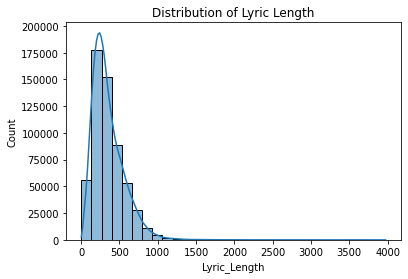

In [32]:
# Length of lyrics (number of words)
bins = [0, 50, 100, 200, 500, 1000]
en_songs['Lyric_Length'] = long_lyrics['lyrics'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

sns.histplot(data=en_songs, x='Lyric_Length', bins=30, kde=True)
plt.title('Distribution of Lyric Length')
plt.show()



In [16]:
# Create a new column for lyric length
en_songs['lyric_length'] = en_songs['lyrics'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Boxplot of lyric length by artist
plt.figure(figsize=(12, 8))
sns.boxplot(data=en_songs, x='lyric_length', y='artist', palette='tab20')
plt.title('Lyric Length by Artist')
plt.xlabel('Lyric Length (Number of Words)')
plt.ylabel('Artist')
plt.show()

KeyboardInterrupt: 

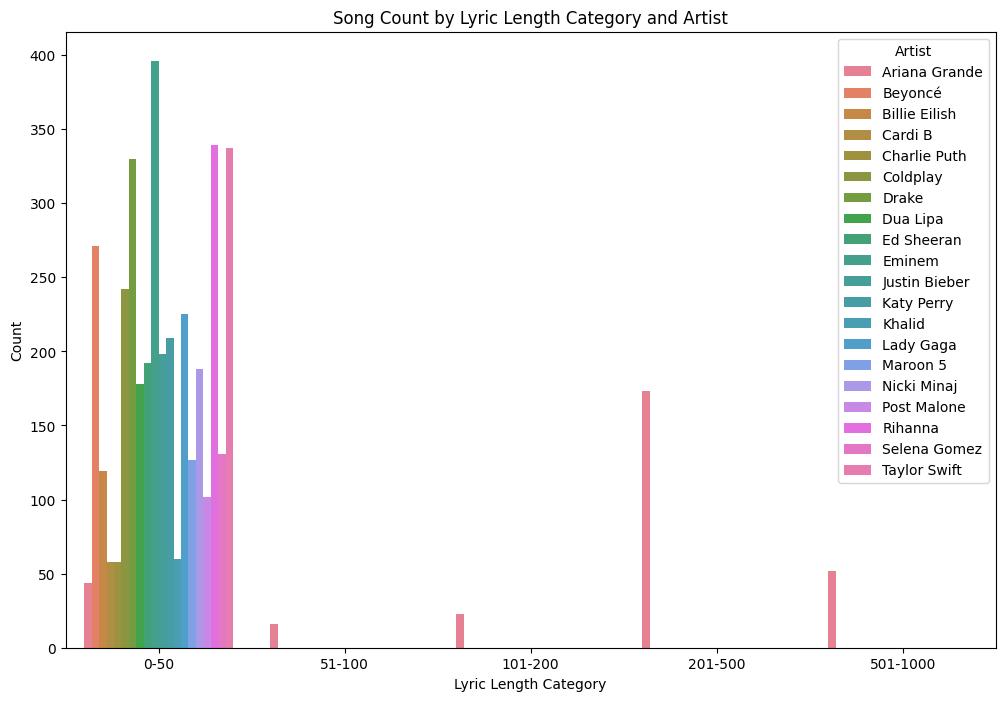

In [57]:
# Create bins for lyric length
bins = [0, 50, 100, 200, 500, 1000]
en_songs['lyric_length_category'] = pd.cut(en_songs['lyric_length'], bins=bins, labels=['0-50', '51-100', '101-200', '201-500', '501-1000'])

# Count of songs by lyric length category and artist
plt.figure(figsize=(12, 8))
sns.countplot(data=en_songs, x='lyric_length_category', hue='Artist')
plt.title('Song Count by Lyric Length Category and Artist')
plt.xlabel('Lyric Length Category')
plt.ylabel('Count')
plt.show()


In [43]:
# Function to extract the most common words for a given artist
import re
def common_words_by_artist(artist_name, n=10):
    artist_lyrics = ' '.join(en_songs[en_songs['artist'] == artist_name]['lyrics'].dropna().tolist())
    words = re.findall(r'\w+', artist_lyrics.lower())
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    word_count = Counter(filtered_words)
    return word_count.most_common(n)

# Example: Get the top 10 words used by a specific artist
for artist in top_artists.index:
    top_words_artist = common_words_by_artist(artist)
    print("Top 10 Words by Artist:")
    print(top_words_artist)


artist
Lil Wayne      989
Juice WRLD     936
Gucci Mane     931
Chief Keef     730
Chris Brown    670
BONES          607
Glee Cast      595
Young Thug     590
Kanye West     582
Wiz Khalifa    536
Name: count, dtype: int64
Lil Wayne
Top 10 Words by Artist:
[('like', 7352), ('got', 4722), ('yeah', 4584), ('nigga', 4352), ('get', 3548), ('bitch', 3319), ('know', 2923), ('lil', 2856), ('fuck', 2541), ('wayne', 2490)]
Juice WRLD
Top 10 Words by Artist:
[('yeah', 8120), ('like', 5447), ('uh', 5062), ('bitch', 3656), ('got', 2922), ('know', 2756), ('huh', 2753), ('fuck', 2627), ('get', 2589), ('oh', 2475)]
Gucci Mane
Top 10 Words by Artist:
[('gucci', 5204), ('got', 5062), ('like', 4690), ('nigga', 3959), ('bitch', 3013), ('mane', 2915), ('get', 2295), ('verse', 2070), ('money', 1987), ('know', 1864)]
Chief Keef
Top 10 Words by Artist:
[('bitch', 4290), ('like', 4072), ('got', 3920), ('nigga', 3189), ('ayy', 2834), ('bang', 2798), ('get', 2594), ('know', 2226), ('shit', 2119), ('yeah', 1930)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Get a list of artists with their concatenated lyrics
top_artists_songs = en_songs[en_songs['artist'].isin(top_artists)]
artists_lyrics = top_artists_songs.groupby('artist')['lyrics'].apply(lambda x: ' '.join(x.dropna()))

# Convert lyrics to TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(artists_lyrics.values)

# Compute cosine similarity between artists
similarity_matrix = cosine_similarity(tfidf_matrix)

# Display the similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=artists_lyrics.index, yticklabels=artists_lyrics.index, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Similarity Between Artists' Lyrics")
plt.show()


ValueError: empty vocabulary; perhaps the documents only contain stop words